In [ ]:
!pip install mlrose_hiive

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import mlrose_hiive as mlrose
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve, learning_curve, train_test_split

In [ ]:
data = pd.read_csv("./spambase.csv")
data.describe()
# exclude id column
input=data.iloc[:,1:-1]
target=data.iloc[:,-1]

Text(0, 0.5, 'Corrleation')

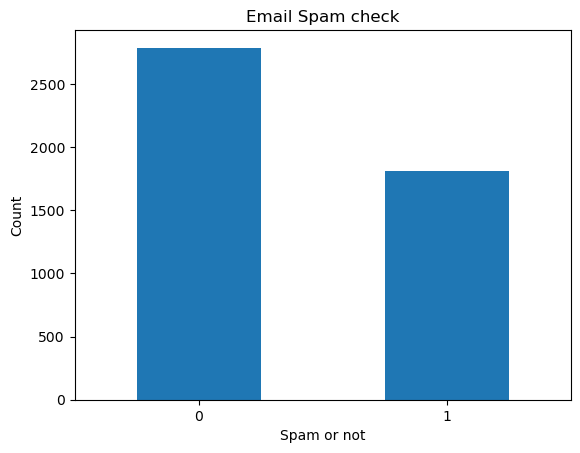

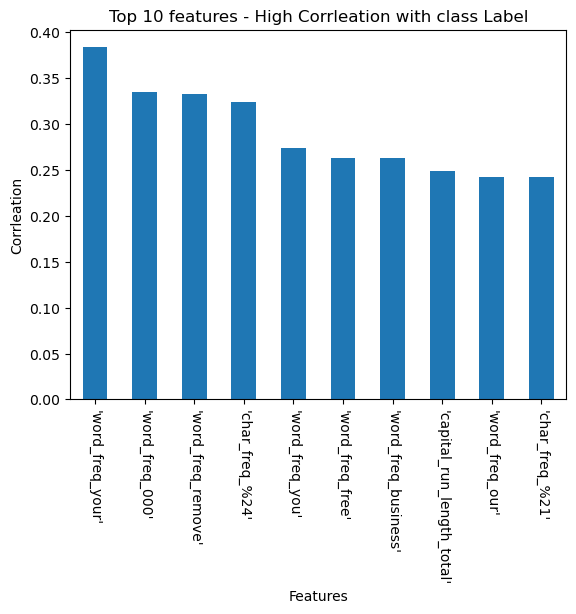

In [ ]:
plt.figure()
target.value_counts().plot(kind="bar", title="Email Spam check")
plt.xticks(rotation = 0)
plt.xlabel("Spam or not")
plt.ylabel("Count")

plt.figure()
corr=data.corr()
plt.title("Top 10 features - High Corrleation with class Label")
corr.sort_values(by=["'class'"],ascending=False).iloc[0].sort_values(ascending=False).head(11)[1:].plot(kind="bar")
plt.xticks(rotation = 270)
plt.xlabel("Features")
plt.ylabel("Corrleation")

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(input, target,random_state = 42, test_size=0.3)
ss = StandardScaler()
train_input_scaled = ss.fit_transform(train_input)
test_input_scaled = ss.transform(test_input)
iters = 10000
attempts = 50

# Genetic Algorithm

In [ ]:
gd_grid_search = {
    'max_iters': [iters],
    "learning_rate_init": [0.002],
    "is_classifier": [True],
    'activation': [mlrose.relu]
}
gd_runner = mlrose.NNGSRunner(x_train=train_input_scaled, y_train=train_target,
                           x_test=test_input_scaled, y_test=test_target,
                           experiment_name="gradient_descent",
                           output_directory=None,
                           grid_search_parameters=gd_grid_search,
                           algorithm=mlrose.algorithms.gradient_descent,
                           iteration_list = [iters],
                           hidden_layer_sizes=[[8]],
                           clip_max=5,
                           bias=True,
                           early_stopping=True,
                           max_attempts=attempts,
                           seed=42,
                           n_jobs=-1,
                          )
gd_run_stats_df, gd_curves_df, gd_cv_results_df, gd_grid_search_cv  = gd_runner.run()

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
gd_conv = gd_curves_df.Fitness.idxmin()

# Simulated Annealing

In [ ]:
sa_grid_search = {
    'max_iters': [iters],
    "is_classifier": [True],
    "temperature_list": [0.1],
    'activation': [mlrose.relu]
}
sa_runner = mlrose.NNGSRunner(x_train=train_input_scaled, y_train=train_target,
                           x_test=test_input_scaled, y_test=test_target,
                           experiment_name="simulated_annealing",
                           output_directory=None,
                           grid_search_parameters=sa_grid_search,
                           algorithm=mlrose.algorithms.simulated_annealing,
                           iteration_list = [iters],
                           hidden_layer_sizes=[[8]],
                           clip_max=5,
                           bias=True,
                           early_stopping=True,
                           max_attempts=attempts,
                           seed=42,
                           n_jobs=-1,
                          )
sa_run_stats_df, sa_curves_df, sa_cv_results_df, sa_grid_search_cv  = sa_runner.run()

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
sa_conv = sa_curves_df.Fitness.idxmin()

# Random Hill Climb

In [ ]:
rhc_grid_search = {
    'max_iters': [iters],
    "is_classifier": [True],
    'restarts': [0],
    'activation': [mlrose.relu]
}
rhc_runner = mlrose.NNGSRunner(x_train=train_input_scaled, y_train=train_target,
                           x_test=test_input_scaled, y_test=test_target,
                           experiment_name="random_hill_climb",
                           output_directory=None,
                           grid_search_parameters=rhc_grid_search,
                           algorithm=mlrose.algorithms.random_hill_climb,
                           iteration_list = [iters],
                           hidden_layer_sizes=[[8]],
                           clip_max=5,
                           bias=True,
                           early_stopping=True,
                           max_attempts=attempts,
                           seed=42,
                           n_jobs=-1,
                          )
rhc_run_stats_df, rhc_curves_df, rhc_cv_results_df, rhc_grid_search_cv  = rhc_runner.run()

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
rhc_conv = rhc_curves_df.Fitness.idxmin()

# Genetic Algorithm

In [ ]:
ga_grid_search = {
    'max_iters': [iters],
    "is_classifier": [True],
    "population_sizes": [40],
    "mutation_rates":[0.1],
    'activation': [mlrose.relu]
}
ga_runner = mlrose.NNGSRunner(x_train=train_input_scaled, y_train=train_target,
                           x_test=test_input_scaled, y_test=test_target,
                           experiment_name="genetic_alg",
                           output_directory=None,
                           grid_search_parameters=ga_grid_search,
                           algorithm=mlrose.algorithms.genetic_alg,
                           iteration_list = [iters],
                           hidden_layer_sizes=[[8]],
                           clip_max=5,
                           bias=True,
                           early_stopping=True,
                           max_attempts=attempts,
                           seed=42,
                           n_jobs=-1,
                          )
ga_run_stats_df, ga_curves_df, ga_cv_results_df, ga_grid_search_cv  = ga_runner.run()

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
ga_conv = ga_curves_df.Fitness.idxmin()

# Comparison algorithms (Fitness vs Iter)

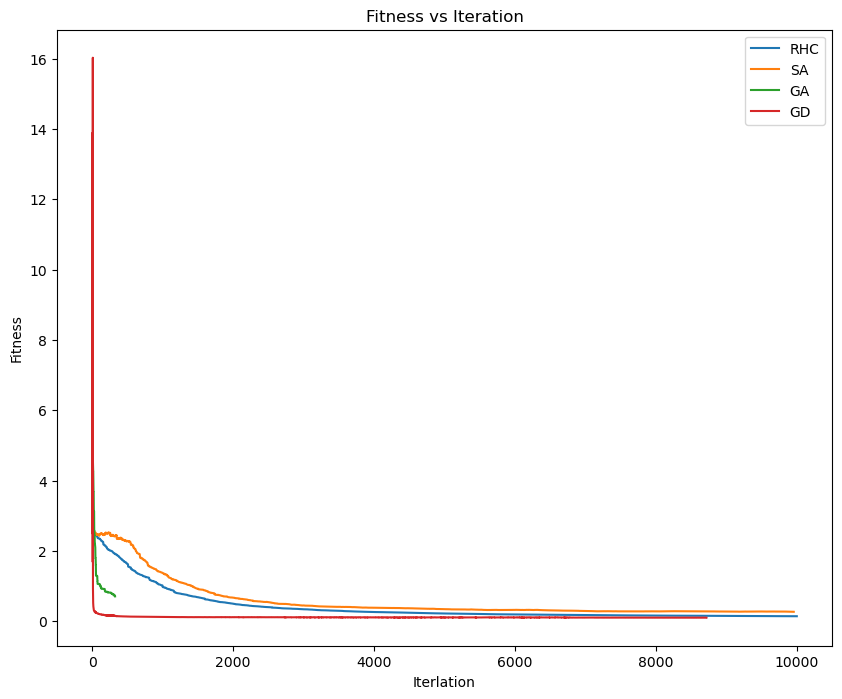

<Figure size 640x480 with 0 Axes>

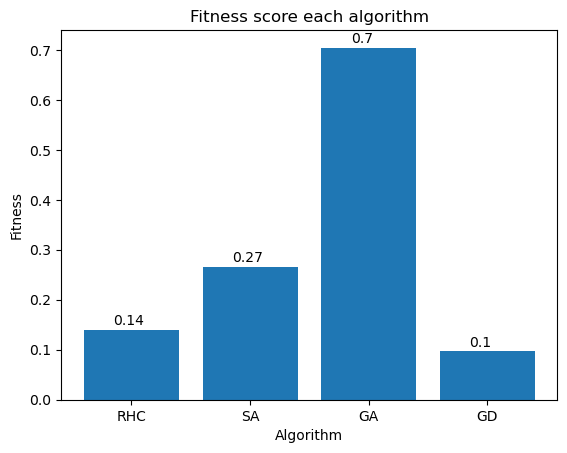

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(rhc_curves_df.Fitness[:rhc_conv+1], label="RHC")
plt.plot(sa_curves_df.Fitness[:sa_conv+1], label="SA")
plt.plot(ga_curves_df.Fitness[:ga_conv+1], label="GA")
plt.plot(gd_curves_df.Fitness[:gd_conv+1], label="GD")
plt.legend(loc="best")
plt.xlabel("Iterlation")
plt.ylabel("Fitness")
plt.title("Fitness vs Iteration")
plt.show()
plt.figure()
algorithms = ['RHC','SA','GA','GD']
times = [rhc_curves_df.Fitness[rhc_conv],
         sa_curves_df.Fitness[sa_conv],
         ga_curves_df.Fitness[ga_conv],
         gd_curves_df.Fitness[gd_conv]]
plt.show()
plt.figure()
plt.xlabel("Algorithm")
plt.ylabel("Fitness")
plt.title("Fitness score each algorithm")
plt.bar(algorithms, times)
for i, v in enumerate(times):
    plt.text(i-0.15, v+0.01 ,str(round(v,2)))
plt.show()



# Comparison algorithms (Function evals vs Iter)

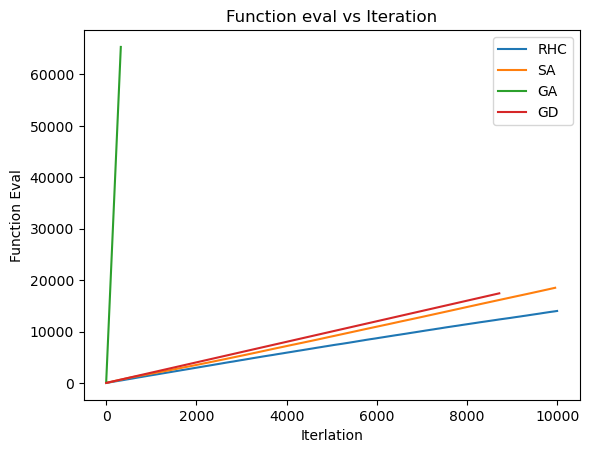

In [ ]:
plt.show()
plt.figure()
plt.plot(rhc_curves_df.FEvals[:rhc_conv+1], label="RHC")
plt.plot(sa_curves_df.FEvals[:sa_conv+1], label="SA")
plt.plot(ga_curves_df.FEvals[:ga_conv+1], label="GA")
plt.plot(gd_curves_df.FEvals[:gd_conv+1], label="GD")
plt.legend(loc="best")
plt.xlabel("Iterlation")
plt.ylabel("Function Eval")
plt.title("Function eval vs Iteration")
plt.show()

# Comparison algorithms (Converge time)

<Figure size 640x480 with 0 Axes>

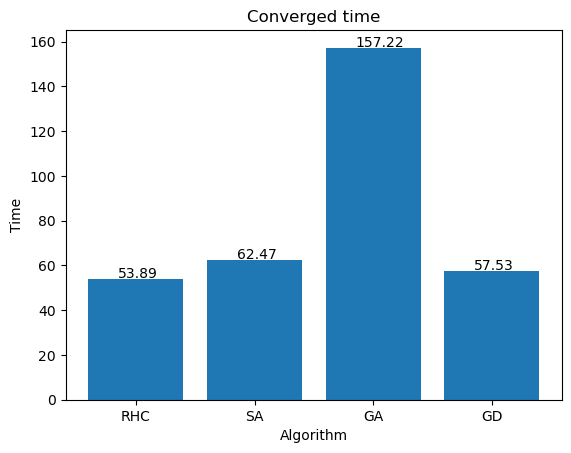

In [ ]:
plt.figure()
algorithms = ['RHC','SA','GA','GD']
times = [rhc_curves_df.Time[rhc_conv],
         sa_curves_df.Time[sa_conv],
         ga_curves_df.Time[ga_conv],
         gd_curves_df.Time[gd_conv]]
plt.figure()
plt.xlabel("Algorithm")
plt.ylabel("Time")
plt.title("Converged time")
plt.bar(algorithms, times)
for i, v in enumerate(times):
    plt.text(i-0.15, v+0.5 ,str(round(v,2)))
plt.show()


In [ ]:
print(sa_grid_search_cv.score(train_input_scaled, train_target))
print(sa_grid_search_cv.score(test_input_scaled, test_target))
print(gd_grid_search_cv.score(train_input_scaled, train_target))
print(gd_grid_search_cv.score(test_input_scaled, test_target))
print(ga_grid_search_cv.score(train_input_scaled, train_target))
print(ga_grid_search_cv.score(test_input_scaled, test_target))
print(rhc_grid_search_cv.score(train_input_scaled, train_target))
print(rhc_grid_search_cv.score(test_input_scaled, test_target))

0.9036800879528135
0.9047602110763341
0.9538296664578767
0.9254863033187615
0.8760056177575948
0.8814549436526208
0.9485308030587745
0.9295539201738277
